**All the code blocks are followed by the markdown describing the Visualisation**
**This notebook was built using Google Colab and some of its code blocks are optimized for Colab only**
**This notebook can be taken as EDA report for a Store business**
**Data is provided by Chris Walshaw and his youtube channel link is :https://www.youtube.com/user/cwalshaw **

First we will create both of the required dataframes. 
1- Daily Customer data,
2- Summary data 

Importing the 'DailyCustomers' data and prepairing the dataframe:

In [24]:
# comment next line if you have hvplots package installed already
!pip install hvplot

import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001126108/DailyCustomers.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

print(data.head())
print('----------------')
print(data.tail())
print('----------------')
print(data.shape)
print('----------------')
print(data.describe())

             RAH  WYG  OMV  TSE  YYO  VYZ  ...  ENY  AEI   SGA  UGJ  ZSD  TAP
Date                                       ...                               
2019-01-01  1059   72  491   92    0   71  ...   68    0  1023   71    0   74
2019-01-02  1152   92  369   71    0   66  ...   95    0   977   73    0   83
2019-01-03  1189   61  371   71    0   64  ...  106    0   871   59    0   76
2019-01-04   580   81  315   75    0   56  ...   87    0   825   70    0   82
2019-01-05  1252   77  349  100    0   66  ...   63    0   874   75    0   76

[5 rows x 40 columns]
----------------
             RAH  WYG  OMV  TSE  YYO  VYZ  ...  ENY  AEI   SGA  UGJ  ZSD  TAP
Date                                       ...                               
2019-12-27  1153  100  323   95   44   65  ...   63   27   863   82  117   80
2019-12-28   900   91  361   83  136   58  ...   82   95   899   70   35   83
2019-12-29   809   89  416   75    0   74  ...   66   82   907   82  176   81
2019-12-30   873  105  4

Importing the required data and crerating the 'summary_data' dataframe for later use:

In [25]:
marketing_cost = pd.read_csv('https://tinyurl.com/ChrisCoDV/001126108/StoreMarketing.csv', index_col=0)
overhead_cost = pd.read_csv('https://tinyurl.com/ChrisCoDV/001126108/StoreOverheads.csv', index_col=0)
store_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/001126108/StoreSize.csv', index_col=0)
store_staff = pd.read_csv('https://tinyurl.com/ChrisCoDV/001126108/StoreStaff.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['marketing_cost'] = marketing_cost.values
summary_data['overhead_cost'] = overhead_cost.values
summary_data['total_customers'] = data.sum().values
summary_data['store_size'] = store_size.values
summary_data['store_staff'] =  store_staff.values
print(summary_data.head())
print(summary_data.describe())

     marketing_cost  overhead_cost  total_customers  store_size  store_staff
RAH           42000          62000           366084        2871           17
WYG            4000          26000            32375         389            3
OMV           11000          87000           132129        1025            8
TSE            3000          59000            30565         509            3
YYO            2000          65000            10851         163            2
       marketing_cost  overhead_cost  total_customers   store_size  store_staff
count       40.000000      40.000000        40.000000    40.000000    40.000000
mean      8250.000000   59400.000000     80796.350000  1059.325000     9.125000
std      10119.161818   26461.195585    103233.186606  1351.206515    11.679892
min       1000.000000   12000.000000      4542.000000    67.000000     1.000000
25%       3000.000000   36000.000000     22607.000000   247.500000     2.000000
50%       3000.000000   64500.000000     28648.500000   44

Now I will create the Visualisations


1- Total customers on each store

RAH    366084
SGA    346917
QSN    328242
SMM    326121
PAA    185643
RGS    170865
QMD    169680
OSG    162104
NAQ    147400
PGL    144485
OMV    132129
MUY    114283
WMB     33839
EFN     33111
WYG     32375
TSE     30565
ENY     30296
BTB     29680
YGY     29651
TAP     29386
XML     27911
UGJ     27191
VSM     26466
UMU     26278
BZM     25858
CNQ     25500
CFG     25355
DTJ     24300
VYZ     24078
WGR     22834
ATT     21926
DZT     20668
NMO     17757
XSV     16280
AEI     15033
ZMS     11313
YYO     10851
NGB     10114
ZSD      4743
MAJ      4542
dtype: int64


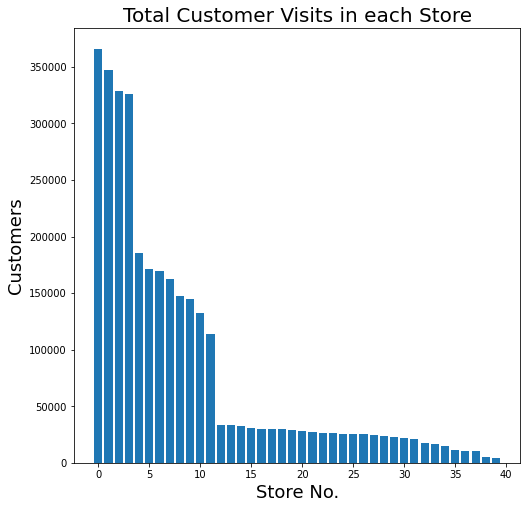

In [26]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1) 
print(data.sum())

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center')
plt.xlabel('Store No.', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.title('Total Customer Visits in each Store', fontsize=20)
plt.show()

We can clearly see the 3 segments in our dataset. 
1.	There are 4 stores which exceed 200,000 customers and all the remaining stores have customer figures less than 200,000. These are the high volume stores which means that these stores have the most amount of customers throughout the year. In the following report, ‘High Volume Store Customers’ refer to those stores’ data which were visited the most. Same is the case for Medium and Low Volume Store Customers. High Volume Customer Stores: ['RAH','SGA','QSN','SMM']

2.	Then there is second segment of Medium Volume Store Customers which starts from around 50,000 to 200,000. There are 8 stores in this range and this set has the medium amount of customer visits throughout the year. Medium Volume Customer Stores: ['PAA','RGS','QMD','OSG','NAQ','PGL','OMV','MUY']
3.	Lastly we have the set of stores for below 50,000 customers throughout the year. This is our third segment. Low Volume Customer Stores: ['WMB','EFN','WYG','TSE','ENY','BTB','YGY','TAP','XML','UGJ','VSM','UMU','BZM','CNQ','CFG','DTJ','VYZ','WGR','ATT','DZT','NMO','XSV','AEI','ZMS','YYO','NGB','ZSD','MAJ']


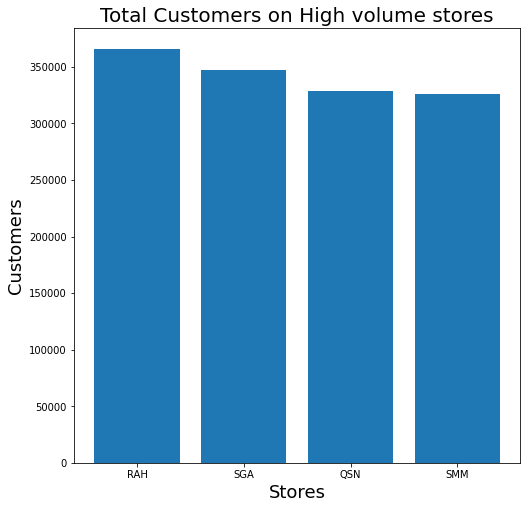

In [27]:
selected_HV = ['RAH','SGA','QSN','SMM']
selected_MV = ['PAA','RGS','QMD','OSG','NAQ','PGL','OMV','MUY']
selected_LV = ['WMB','EFN','WYG','TSE','ENY','BTB','YGY','TAP','XML','UGJ','VSM','UMU','BZM','CNQ','CFG','DTJ','VYZ','WGR','ATT','DZT','NMO','XSV','AEI','ZMS','YYO','NGB','ZSD','MAJ']     
data1= data[selected_HV]

data1 = data[selected_HV]
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data1.columns))
plt.bar(x_pos, data1.sum(), align='center')
plt.xticks(x_pos, data1.columns)
plt.xlabel('Stores', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.title('Total Customers on High volume stores', fontsize=20)
plt.show()

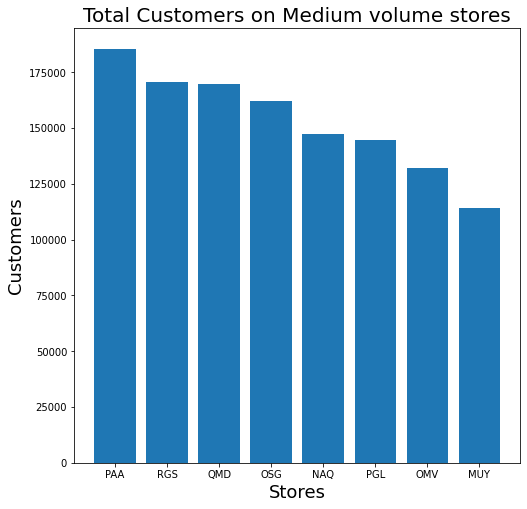

In [28]:
data1 = data[selected_MV]
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data1.columns))
plt.bar(x_pos, data1.sum(), align='center')
plt.xticks(x_pos, data1.columns)
plt.xlabel('Stores', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.title('Total Customers on Medium volume stores', fontsize=20)
plt.show()

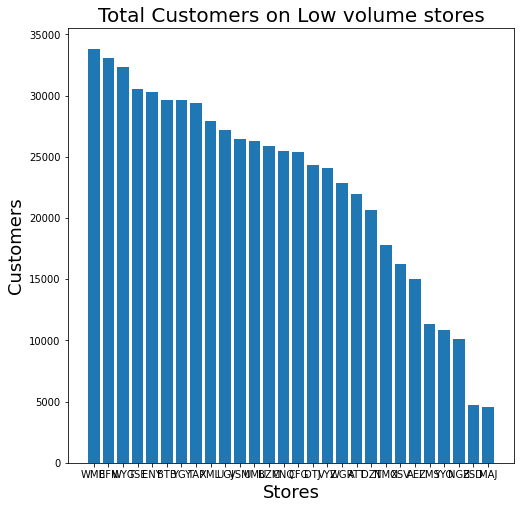

In [29]:
data1 = data[selected_LV]
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data1.columns))
plt.bar(x_pos, data1.sum(), align='center')
plt.xticks(x_pos, data1.columns)
plt.xlabel('Stores', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.title('Total Customers on Low volume stores', fontsize=20)
plt.show()

2- Now I will create a pie chart showing customers on High and Medium volume store. Low volume customer stores are collectively represented by the 'others' section on pie chart. The code autimatically selects the high and medium customer stores given the differentiting case.

             RAH   SGA  QSN   SMM  PAA  RGS  ...  OSG  NAQ  PGL  OMV  MUY  Others
Date                                         ...                                 
2019-01-01  1059  1023  991   890  562  541  ...  490  384  411  491  401    1577
2019-01-02  1152   977  932  1064  515  472  ...  467  536  345  369  285    1681
2019-01-03  1189   871  853   784  495  520  ...  416  290  377  371  346    1556
2019-01-04   580   825  809   814  469  377  ...  367  420  385  315  145    1589
2019-01-05  1252   874  803   945  460  393  ...  375  251  345  349  230    1651

[5 rows x 13 columns]


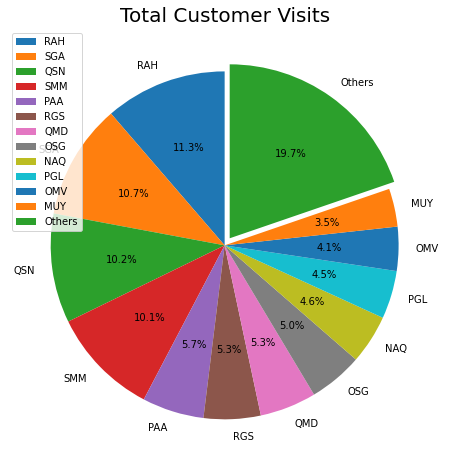

In [30]:
explodeList = []
selected = []
columns = data.columns
data['Others'] = [0] * len(data.index)
for name in columns:
    total_hits = data[name].sum()
    if total_hits > 100000:
        selected.append(name)
        explodeList.append(0)
    else:
        data['Others'] += data[name]
selected.append('Others')
explodeList.append(0.05)
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.pie(data[selected].sum(), labels=selected, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Total Customer Visits', fontsize=20)
plt.legend(loc=2)
plt.show()



We can clearly see that more than 40% (10.7 + 10.3 + 11.3 + 10.2) of customer visits are on just 4 stores and the rest of customers are distributed among the other 36 stores. All the low volume stores have been grouped into one category ‘others’ for this visualisation as the individual visits for these stores were far less than the high or medium volume customer stores.

3-Now I will create 30-day rolling average line plot for High Volume Store Customers:


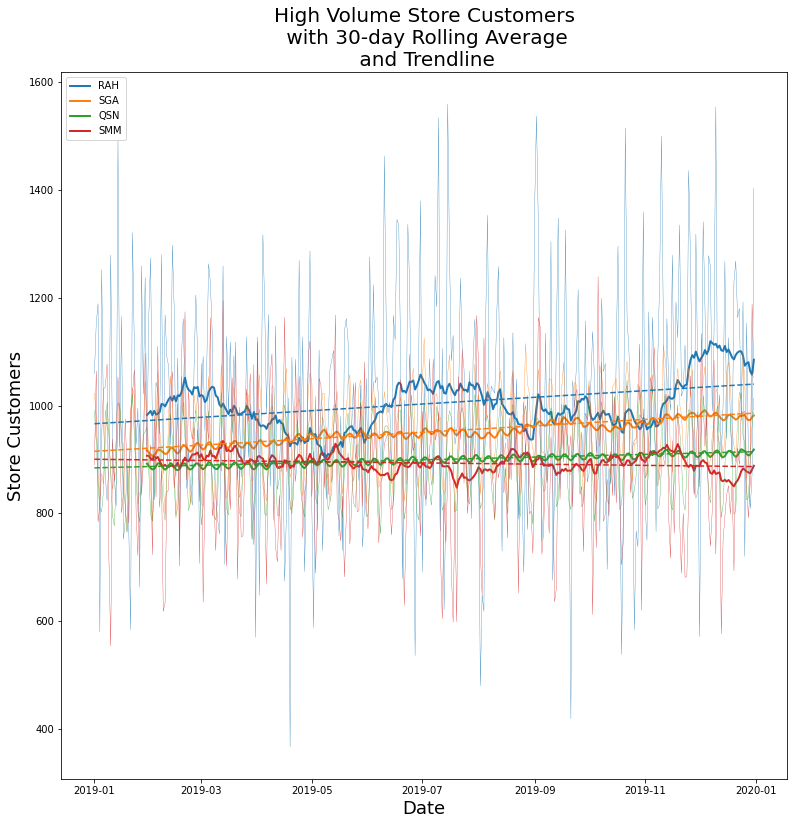

In [31]:
period = 30
rolling_average = data.rolling(window=period).mean()

#below is code for 30 day rolling average
plt.figure(figsize=(13, 13))
plt.plot(rolling_average[selected_HV],linewidth=2)
# plt.ylim(ymin=0)

#below is code for plotting raw data for original time series
plt.gca().set_prop_cycle(None)
plt.plot(data[selected_HV], linewidth=0.3)

#below is code for trendline
plt.gca().set_prop_cycle(None)
for name in selected_HV:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')


plt.xlabel('Date', fontsize=18)
plt.ylabel('Store Customers', fontsize=18)
plt.title('High Volume Store Customers\n with 30-day Rolling Average\n and Trendline', fontsize=20)
plt.legend(selected_HV, loc=2)
plt.show()

We can see that customer visits to stores ‘RAH’ and ‘SMM’ is quite fluctuating and there is no particular pattern which they follow. However this is not the case with ‘SGA’ and ‘QSN’. Both of these store’s rolling average lines are pretty neat and follow a consistent pattern throughout the year. This can be vital sign for the seasonality in these stores as we can see both of these continue to have similar kind of ups and downs throughout the time series. We can also see that SGA and QSN rolling average lines are very similar to each other which births the idea of correlation. We will further investigate the seasonality and correlation in below visualisations.

3.5-Seeing the autocorrelation between high and medium volume customer stores:

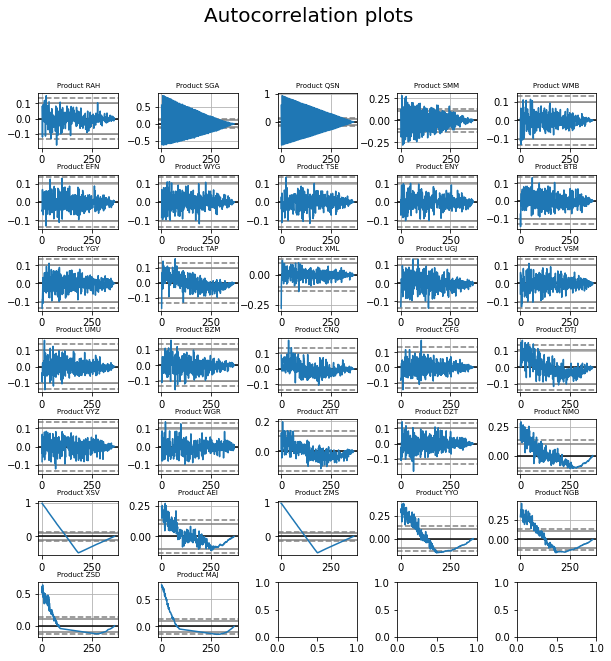

In [32]:
selected= selected_HV + selected_LV 
row = 0
col = 0
fig, axes = plt.subplots(figsize=(10, 10), nrows=7, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in data[selected].columns:
    sub = pd.plotting.autocorrelation_plot(data[name], axes[row, col])
    sub.set_title('Product ' + name, fontsize=7)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()



4- Investigating the QSN store:

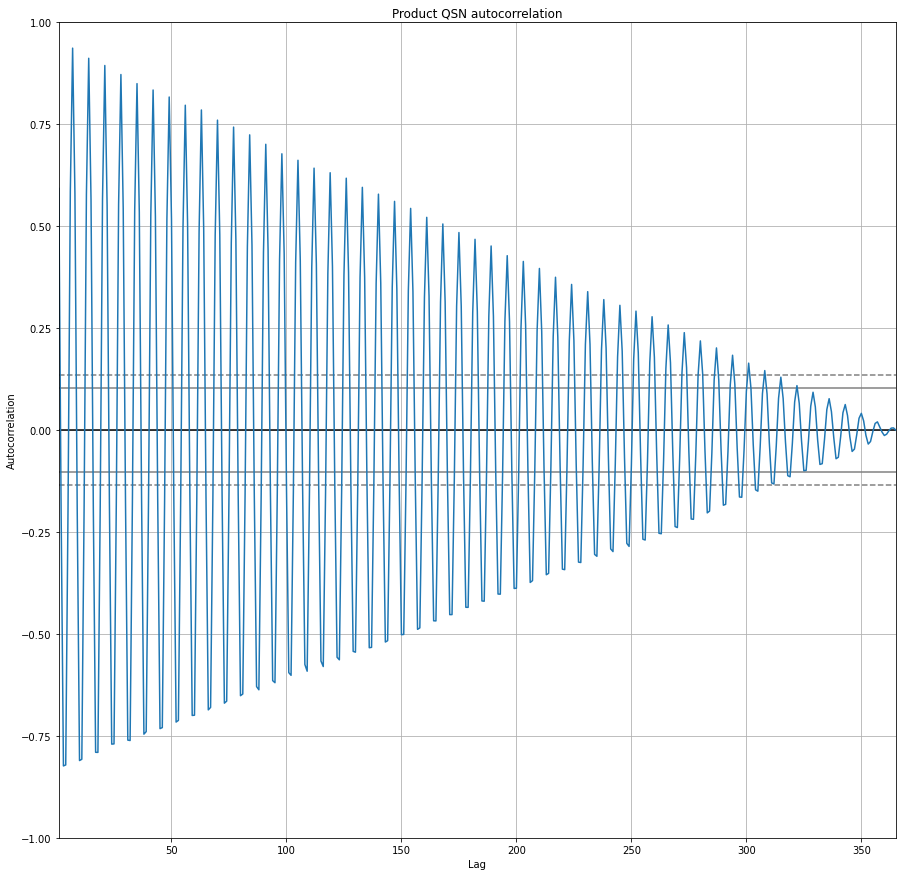

In [33]:
plt.figure(figsize=(15, 15))
pd.plotting.autocorrelation_plot(data['QSN'])
plt.title('Product QSN autocorrelation')
plt.show()


We can clearly see the line plots making consecutive bumps after every 7 days. This might be hard to notice from figure but there is a seasonality pattern for 7 days for this store as the second crest forms on 7th day and then repeats itself after each 7 day interval.  

I will create 28 day rolling average lines and trendlines for medium volume store customers

            PAA  RGS  QMD  OSG  NAQ  PGL  OMV  MUY
Date                                              
2019-01-01  562  541  579  490  384  411  491  401
2019-01-02  515  472  506  467  536  345  369  285
2019-01-03  495  520  330  416  290  377  371  346
2019-01-04  469  377  442  367  420  385  315  145
2019-01-05  460  393  363  375  251  345  349  230
------------------------------------


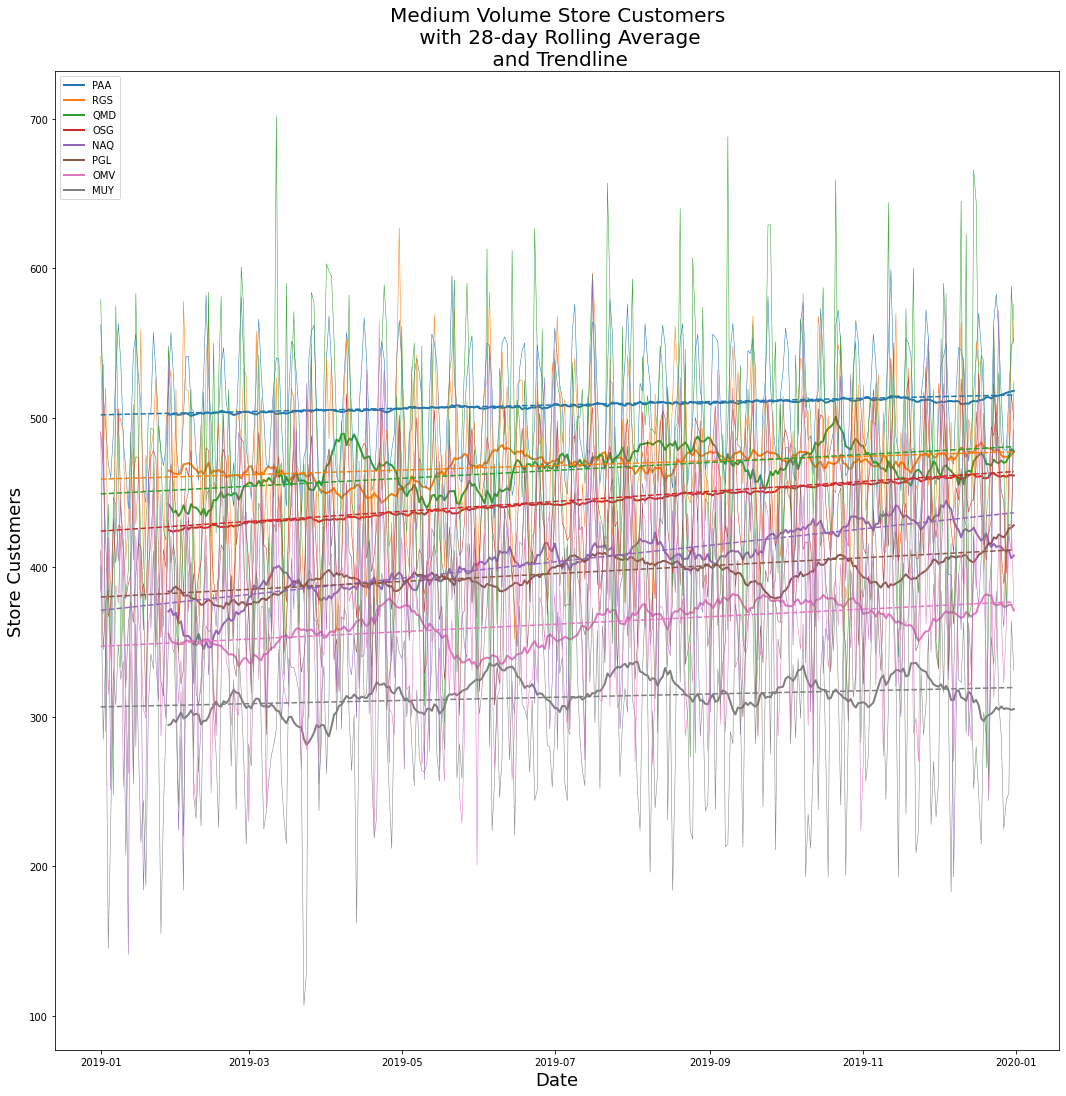

In [34]:
period = 28
rolling_average = data.rolling(window=period).mean()

print(data[selected_MV].head())

print('------------------------------------')

#below is code for 28 day rolling average
plt.figure(figsize=(18, 18))
plt.plot(rolling_average[selected_MV],linewidth=2)
# plt.ylim(ymin=0)

# #below is code for plotting raw data for original time series
plt.gca().set_prop_cycle(None)
plt.plot(data[selected_MV], linewidth=0.5)

#below is code for trendline
plt.gca().set_prop_cycle(None)
for name in selected_MV:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')


plt.xlabel('Date', fontsize=18)
plt.ylabel('Store Customers', fontsize=18)
plt.title('Medium Volume Store Customers\n with 28-day Rolling Average\n and Trendline', fontsize=20)
plt.legend(selected_MV, loc=2)
plt.show()

5- Rolling average and trendline for low volume store customers

------------------------------------


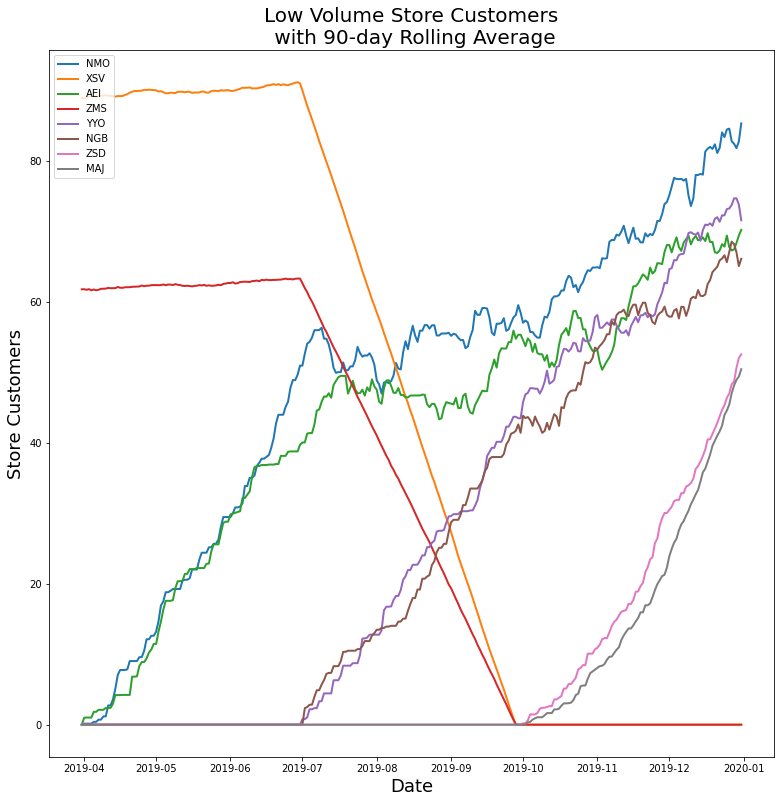

In [35]:
period = 90
rolling_average = data.rolling(window=period).mean()

selected_LV1 =['NMO','XSV','AEI','ZMS','YYO','NGB','ZSD','MAJ']


print('------------------------------------')

#below is code for 28 day rolling average
plt.figure(figsize=(13, 13))
plt.plot(rolling_average[selected_LV1],linewidth=2)
# plt.ylim(ymin=0)

# #below is code for plotting raw data for original time series
# plt.gca().set_prop_cycle(None)
# plt.plot(data[selected_MV], linewidth=0.5

# below is code for trendline
# plt.gca().set_prop_cycle(None)
# for name in selected_LV:
#     x = np.arange(len(data[name]))
#     z = np.polyfit(x, data[name], 1)
#     trend = np.poly1d(z)
#     plt.plot(data.index, trend(x), linestyle='--')


plt.xlabel('Date', fontsize=18)
plt.ylabel('Store Customers', fontsize=18)
plt.title('Low Volume Store Customers\n with 90-day Rolling Average', fontsize=20)
plt.legend(selected_LV1, loc=2)
plt.show()

Beginning from 0, we can see that the stores AEI and NMO have consistently increased the number of customers visiting the store from start of the year 2019. We can also see the opening of 2 stores namely NGB and YYO from the month of July, 2019. We can also see that two stores – XSV and ZMS have completely halted their operations and reduced the customer visits to 0 till late September, 2019. This might be the case where these 2 stores have been closed or shut down due to some major reason. But as seen from the figure 5, two new stores - MAJ and ZSD have begun their operations from start of October, 2019 and have rapidly increased the customer visits till end of year.

6- Finding all the highly correlated stores using correlation coeficient matrix:

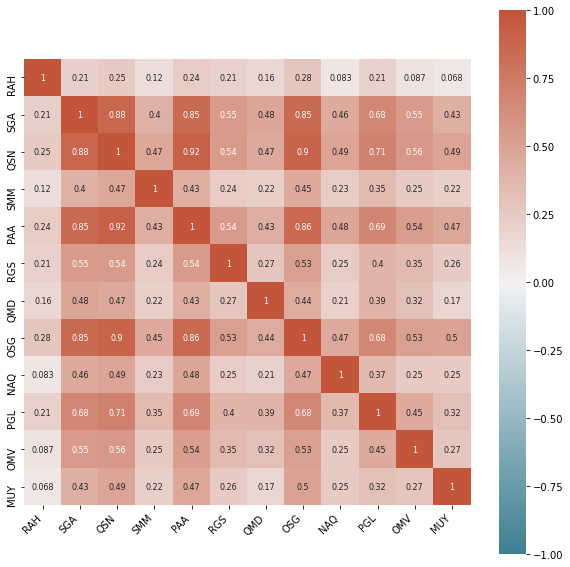

In [36]:
import seaborn as sns
selected = selected_HV + selected_MV
plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

From above figure we can see that none of the stores are negatively correlated to any other store. For this implementation, we are only interested to know the stores which have coefficient greater than or equal to 0.85. Correlated store pairs: SGA and OSG (0.85), QSN and OSG (0.90), SGA and PAA (0.85), QSN and PAA (0.92), SGA and QSN (0.88). 

7- bubble plot on summary_data. This visualisation is interactive. Tools available for interaction: Pan, box_zoom, wheel_zoom, undo, redo, hover, save and reset.

In [17]:
!pip install hvplot

     |████████████████████████████████| 3.1MB 17.2MB/s 


In [42]:
summary_data['BubbleSize'] = summary_data['total_customers'] * 0.01 * 0.75

plot = summary_data.hvplot.scatter(
    frame_height=500, frame_width=500,
    title='Staff Size vs Marketing Cost (vs Total Customers)',
    xlabel='Employees (N/unit)', ylabel='Marketing (£/unit)',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x='store_staff', y='marketing_cost', size='BubbleSize'
)

hv.extension('bokeh')
plot

Output hidden; open in https://colab.research.google.com to view.

We can see that as number of staff increases in the store and as marketing cost increases, the size of bubble also enlarges. So far I did not find any anomalies with this general trend, RAH and SGA have far less employees but as the marketing cost have been so high, they are performing in terms of customer visits. There is a proper balance in the dataset which makes sense, as the company increased the marketing cost the customer visits increased. And as the customer visits increased, the number of employees in that store also increased (in case of SMM and QSN). All these factors imply on each other and there can be many possible reasons for each change.

8- Distribution, Now I will make interactive Histogram which will represent frequency classes of customers. Tools available for interaction: Pan, box_zoom, wheel_zoom, undo, redo, hover, save and reset.

In [41]:
x_min = 350
x_max = 1600
bin_width = 100
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plot = data[selected_HV].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Total Customers per day', ylabel='Frequency',
    title='High Volume Store Customers',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)

hv.extension('bokeh')
plot


Output hidden; open in https://colab.research.google.com to view.

I have included the High Volume Customer Stores so that they can be easily visualized. This is an interactive visualization (you can interact with it if you run on Google Colab the submitted notebook) and user can easily hide some of the stores data and analyze the others and do much more with it using hvplot’s HTML interface. Among these 4 we can see that RAH’s frequency distribution is most spread, which means there were good and bad days both with majority being normal. Whereas SGA and QSN’s distribution mostly comprise of same class, it is much narrow, it’s not flattened like RAH’s distribution has. This means that SGA’s and QSN’s have been serving a constant number class of customers all year.  